# Time Series Analysis of Day 3

## ARIMA

#### Auto Regression

## SARIMAX

#### Seasonality

##### Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal.

## For Solving a Problem using ARIMA & SARIMAX 

### Unit Root Test

## Implementation of Arima

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline = pd.read_csv('AirPassengers.csv')
df_airline.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df_airline.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [4]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### Object to Datetime Conversion

In [5]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [6]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df_airline.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


### Set Index 

In [8]:
df_airline.set_index('Month', inplace = True)

In [9]:
df_airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

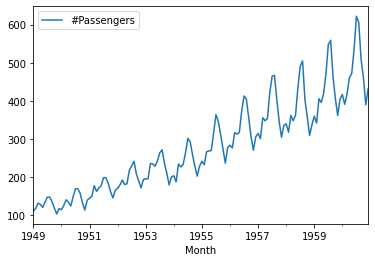

In [10]:
df_airline.plot()

### Ad Fuller Test

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]) )
    if result[1] <=0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is non stationary")

In [13]:
adf_test(df_airline['#Passengers'])

ADF Statistics: 0.8153688792060502
p-value: 0.991880243437641
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non stationary


### Use Technique Differencing

In [14]:
df_airline['Passengers First Difference'] = df_airline['#Passengers'] - df_airline['#Passengers'].shift(1)

In [15]:
df_airline.head()

,#Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


### Again AD Fuller Test for Passengers First Difference

In [16]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824170006
p-value: 0.05421329028382468
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non stationary


### Again Use Technique Differencing

In [17]:
df_airline['Passengers Second Difference'] = df_airline['Passengers First Difference'] - df_airline['Passengers First Difference'].shift(1)

In [18]:
df_airline.head()

,#Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


### AD Fuller Test for Passengers Second difference

In [19]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468527
p-value: 2.732891850014085e-29
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


## 12 month Seasonality Creation

### Use Technique Differencing

In [20]:
df_airline['Passengers 12 Difference'] = df_airline['#Passengers'] - df_airline['#Passengers'].shift(12)

### AD Fuller Test for passengers 12 difference

In [21]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p-value: 0.011551493085514982
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### Importing acf and pacf

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### ACF Plotting

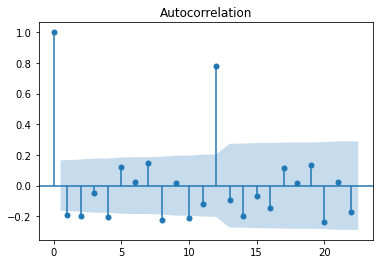

In [23]:
acf = plot_acf(df_airline['Passengers Second Difference'].dropna())

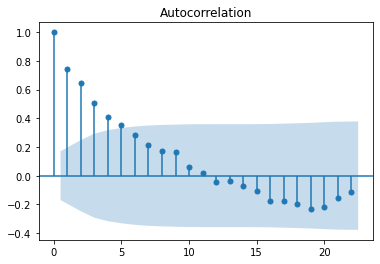

In [24]:
acf12 = plot_acf(df_airline['Passengers 12 Difference'].dropna())

### PACF Plotting

C:\Users\nw00790817\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


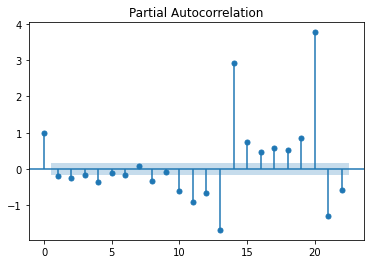

In [25]:
result = plot_pacf(df_airline['Passengers Second Difference'].dropna())

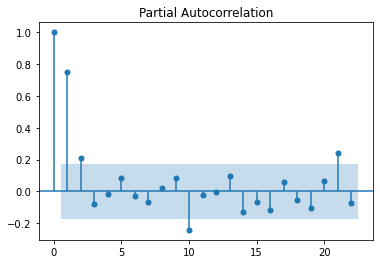

In [26]:
pacf12 = plot_pacf(df_airline['Passengers 12 Difference'].dropna())

## Split train & test Data

In [27]:
df_airline

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [28]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [29]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end + timedelta(days=1) : test_dataset_end]

In [30]:
df_airline[train_dataset_end + timedelta(days=1) : test_dataset_end]

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [31]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


## Create an ARIMA Model


In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
train_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [34]:
# https://www.statsmodels.org/stable/tsa.html             (Documentation of Statsmodels Time Series Analysis)

In [35]:
# How to Create an ARIMA Model for Time Series Forecasting in Python (follow the link given below)

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


# p: The number of lag observations included in the model, also called the lag order.
# d: The number of times that the raw observations are differenced, also called the degree of differencing.
# q: The size of the moving average window, also called the order of moving average.

In [36]:
model_ARIMA = ARIMA(train_data['#Passengers'],order=(4,2,0))  # Order(p,d,q)   

C:\Users\nw00790817\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\nw00790817\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

In [37]:
model_Arima_fit = model_ARIMA.fit()

In [38]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                   82
Model:                 ARIMA(4, 2, 0)   Log Likelihood                -372.621
Method:                       css-mle   S.D. of innovations             22.628
Date:                Fri, 16 Dec 2022   AIC                            757.243
Time:                        12:12:12   BIC                            771.683
Sample:                    03-01-1949   HQIC                           763.040
                         - 12-01-1955                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1194      0.972     -0.123      0.902      -2.025       1.786
ar.L1.D2.#Passengers    -0.4352      0.108     -4.026      0.000      -0.647      -0.223
ar.L2.D2.#Passengers    -0.4988      0.115     -4.354      0.000      -0.723      -0.274
ar.L3.D2.#Passengers    -0.2986      0.113     -2.641      0.008      -0.520      -0.077
ar.L4.D2.#Passengers    -0.3876      0.106     -3.665      0.000      -0.595      -0.180
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5277           -1.1351j            1.2517           -0.1807
AR.2            0.5277           +1.1351j            1.2517            0.1807
AR.3           -0.9129           -0.9019j            1.2833           -0.3760
AR.4           -0.9129           +0.9019j            1.2833            0.3760
-----------------------------------------------------------------------------
"""

### Prediction

In [39]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [40]:
pred = model_Arima_fit.predict( start=pred_start_date,  end=pred_end_date )

residuals = test_data['#Passengers'] - pred

C:\Users\nw00790817\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [41]:
residuals

Month
1956-01-01    310.881611
1956-02-01    303.654703
1956-03-01    315.983165
1956-04-01    322.665026
1956-05-01    296.237149
1956-06-01    368.935498
1956-07-01    423.879521
1956-08-01    405.856645
1956-09-01    359.460528
1956-10-01    302.658992
1956-11-01    266.069581
1956-12-01    308.460867
1957-01-01    315.969889
1957-02-01    302.430389
1957-03-01    356.382764
1957-04-01    346.189497
1957-05-01    355.106786
1957-06-01    422.500718
1957-07-01    465.433915
1957-08-01    467.544085
1957-09-01    403.668759
1957-10-01    346.861982
1957-11-01    305.207478
1957-12-01    336.179418
1958-01-01    340.300865
1958-02-01    318.083966
1958-03-01    361.992252
1958-04-01    348.114956
1958-05-01    363.124998
1958-06-01    435.170875
1958-07-01    491.144812
1958-08-01    505.082716
1958-09-01    404.105147
1958-10-01    359.116358
1958-11-01    310.128934
1958-12-01    337.135239
1959-01-01    360.114182
1959-02-01    342.112100
1959-03-01    406.116752
1959-04-01    396.1

### Residual PLot


<AxesSubplot:ylabel='Density'>

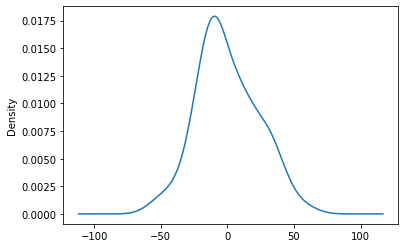

In [42]:
model_Arima_fit.resid.plot(kind='kde')

# Residual plot information

# https://analyse-it.com/docs/user-guide/fit-model/linear/residual-plot#:~:text=A%20residual%20plot%20shows%20the,band%20around%20the%20identity%20line.

# https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378

In [43]:
test_data['Predicted_ARIMA'] = pred

C:\Users\NW0079~1\AppData\Local\Temp/ipykernel_2756/284031954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


<AxesSubplot:xlabel='Month'>

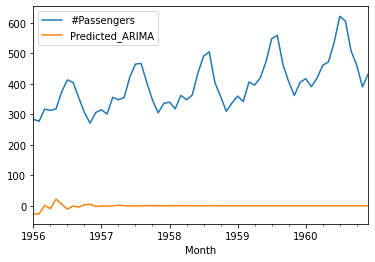

In [44]:
test_data[['#Passengers', 'Predicted_ARIMA']].plot()

## Implementation of SARIMA

### P, Q value for Sarimax

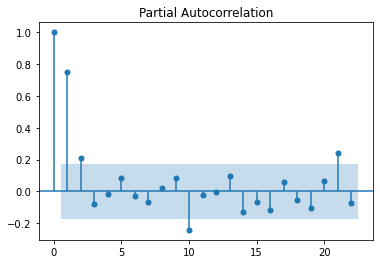

In [45]:
pacf12 = plot_pacf(df_airline['Passengers 12 Difference'].dropna())       # p value

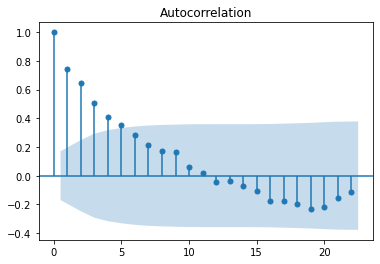

In [46]:
acf12 = plot_acf(df_airline['Passengers 12 Difference'].dropna())         # q value

## Create an SARIMA Model

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
model_SARIMA = SARIMAX(train_data['#Passengers'],order=(3,0,5), seasonal_order = (0,1,0,12) ) 

C:\Users\nw00790817\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nw00790817\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [49]:
# https://towardsdatascience.com/time-series-forecast-in-python-using-sarimax-and-prophet-c970e6056b5b   

In [50]:
model_SARIMA_fit = model_SARIMA.fit()

C:\Users\nw00790817\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Fri, 16 Dec 2022   AIC                            548.481
Time:                                     12:12:13   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.639
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6001      0.940      0.638      0.523      -1.243       2.443
ar.L2          0.8317      0.233      3.574      0.000       0.376       1.288
ar.L3         -0.4547      0.897     -0.507      0.612      -2.213       1.303
ma.L1          0.1819      1.183      0.154      0.878      -2.136       2.500
ma.L2         -0.5364      1.282     -0.418      0.676      -3.049       1.977
ma.L3         -0.0986      0.390     -0.253      0.801      -0.864       0.667
ma.L4         -0.1270      0.345     -0.368      0.713      -0.803       0.549
ma.L5          0.2471      0.362      0.684      0.494      -0.461       0.956
sigma2        87.6924     83.159      1.055      0.292     -75.297     250.681
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
test_data.tail()

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,-0.119329
1960-09-01,508,-98.0,-82.0,45.0,-0.119513
1960-10-01,461,-47.0,51.0,54.0,-0.119474
1960-11-01,390,-71.0,-24.0,28.0,-0.119389
1960-12-01,432,42.0,113.0,27.0,-0.119359


### Prediction

In [53]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [54]:
pred_Sarima = model_SARIMA_fit.predict( start=datetime(1956,6,6), end=datetime(1960,12,1) )

residuals = test_data['#Passengers'] - pred_Sarima

C:\Users\nw00790817\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


### Residual PLot

<AxesSubplot:xlabel='Month'>

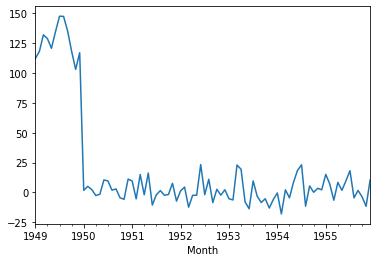

In [55]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

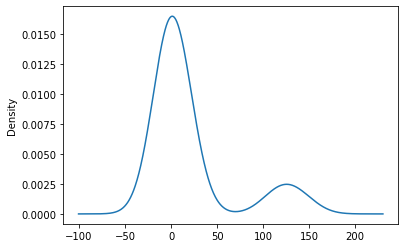

In [56]:
model_SARIMA_fit.resid.plot(kind='kde')

In [57]:
test_data['Predicted_SARIMA'] = pred_Sarima

C:\Users\NW0079~1\AppData\Local\Temp/ipykernel_2756/2531234035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA'] = pred_Sarima


In [58]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284,6.0,-35.0,42.0,-26.881611,NaN
1956-02-01,277,-7.0,-13.0,44.0,-26.654703,NaN
1956-03-01,317,40.0,47.0,50.0,1.016835,NaN
1956-04-01,313,-4.0,-44.0,44.0,-9.665026,NaN
1956-05-01,318,5.0,9.0,48.0,21.762851,NaN
1956-06-01,374,56.0,51.0,59.0,5.064502,NaN
1956-07-01,413,39.0,-17.0,49.0,-10.879521,403.409907
1956-08-01,405,-8.0,-47.0,58.0,-0.856645,385.086403
1956-09-01,355,-50.0,-42.0,43.0,-4.460528,349.458137


<AxesSubplot:xlabel='Month'>

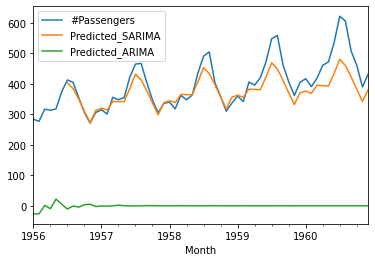

In [59]:
test_data[['#Passengers','Predicted_SARIMA', 'Predicted_ARIMA']].plot()